In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [2]:
df= pd.read_csv("/content/sample_data/valorant-stats.csv")

In [3]:
df.head()


,Name,Weapon Type,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
0,Classic,Sidearm,0,6.75,Low,12,78,26,22,78,26,22,66,22,18
1,Shorty,Sidearm,200,3.30,Low,2,36,12,10,24,8,6,9,3,2
2,Frenzy,Sidearm,400,10.00,Low,13,78,26,22,63,21,17,63,21,17
3,Ghost,Sidearm,500,6.75,Medium,15,105,33,26,88,25,21,88,25,21
4,Sheriff,Sidearm,800,4.00,High,6,160,55,47,160,55,47,145,50,43


<Axes: xlabel='Magazine Capacity', ylabel='Fire Rate'>

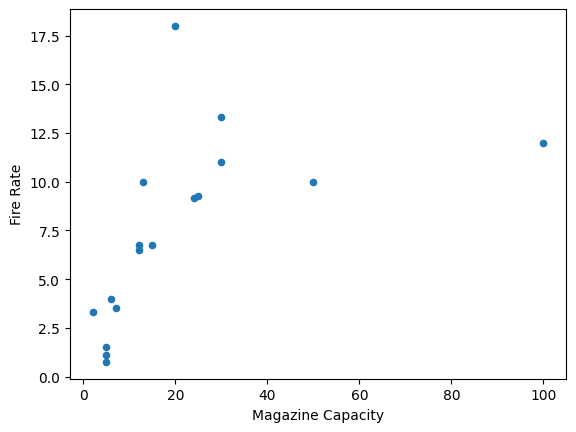

In [9]:
df.plot.scatter(x="Magazine Capacity",y="Fire Rate")


In [10]:
model=LinearRegression()
model.fit(df[["Magazine Capacity"]], df["Fire Rate"])

LinearRegression()

In [11]:
model.predict([[1],[10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.21625672, 6.21577045])

In [12]:
print(f"la linea que intersecta en :{model.intercept_} y tiene una pendiente de {model.coef_}")

la linea que intersecta en :5.105199639845056 y tiene una pendiente de [0.11105708]


In [13]:
model.coef_ *df["Magazine Capacity"]+ model.intercept_


0      6.437885
1      5.327314
2      6.548942
3      6.771056
4      5.771542
5      7.326341
6      8.436912
7      7.770570
8      6.437885
9      8.436912
10     7.881627
11     5.660485
12     5.660485
13     5.660485
14     5.882599
15    10.658054
16    16.210908
Name: Magazine Capacity, dtype: float64

In [15]:
pred=pd.Series(model.predict(df[["Magazine Capacity"]]))


In [16]:
df["Prediccion"]=pred


In [17]:
df

,Name,Weapon Type,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2,Prediccion
0,Classic,Sidearm,0,6.75,Low,12,78,26,22,78,26,22,66,22,18,6.437885
1,Shorty,Sidearm,200,3.30,Low,2,36,12,10,24,8,6,9,3,2,5.327314
2,Frenzy,Sidearm,400,10.00,Low,13,78,26,22,63,21,17,63,21,17,6.548942
3,Ghost,Sidearm,500,6.75,Medium,15,105,33,26,88,25,21,88,25,21,6.771056
4,Sheriff,Sidearm,800,4.00,High,6,160,55,47,160,55,47,145,50,43,5.771542
5,Stinger,SMG,1000,18.00,Low,20,67,27,23,62,25,21,62,25,21,7.326341
6,Spectre,SMG,1600,13.33,Medium,30,78,26,22,66,22,18,66,22,18,8.436912
7,Bulldog,Rifle,2100,9.15,Medium,24,116,35,30,116,35,30,116,35,30,7.770570
8,Guardian,Rifle,2500,6.50,Medium,12,195,65,49,195,65,49,195,65,49,6.437885
9,Phantom,Rifle,2900,11.00,Medium,30,156,39,33,140,35,30,124,31,26,8.436912


<Axes: xlabel='Magazine Capacity', ylabel='Fire Rate'>

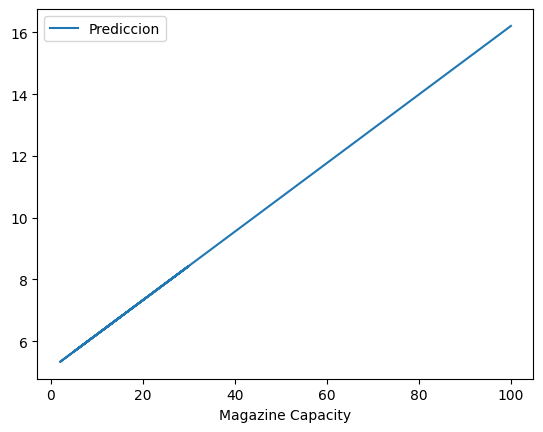

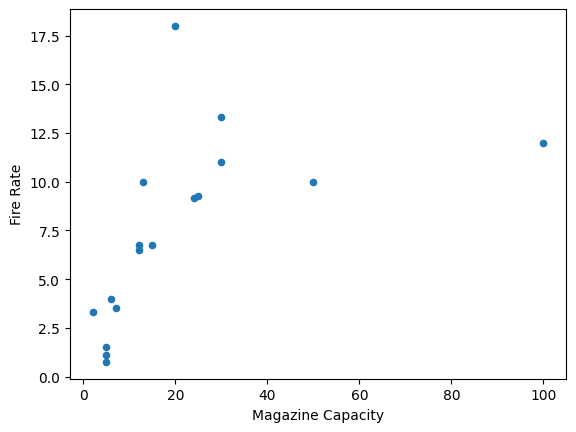

In [19]:
linea=df.plot.line(x="Magazine Capacity",y="Prediccion")
df.plot.scatter(x="Magazine Capacity",y="Fire Rate")

<Axes: xlabel='Magazine Capacity'>

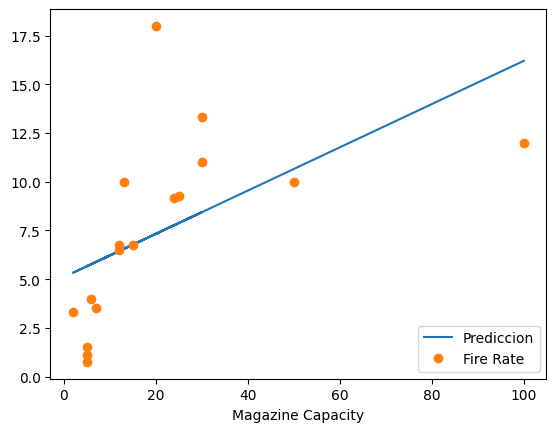

In [21]:
df.plot(x="Magazine Capacity", y=["Prediccion", "Fire Rate"], style=["-", "o"])
